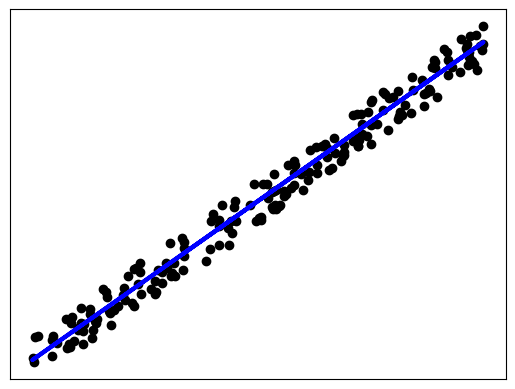

In [7]:
import numpy as np
import sklearn.linear_model as linear_model
import matplotlib.pyplot as plt
# Генерировать случайные функции
num_samples = 1000
x = np.random.random((400,1))
y = 7*x+ np.random.random((400,1))

# Распечатать статистику набора данных
x

diabetes_X =x
diabetes_y = y
# Use only one feature


# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-200]
diabetes_X_test = diabetes_X[-200:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-200]
diabetes_y_test = diabetes_y[-200:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)


# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


[0.61604729] [0.64091473]
[0.5131109] [7.02630426]


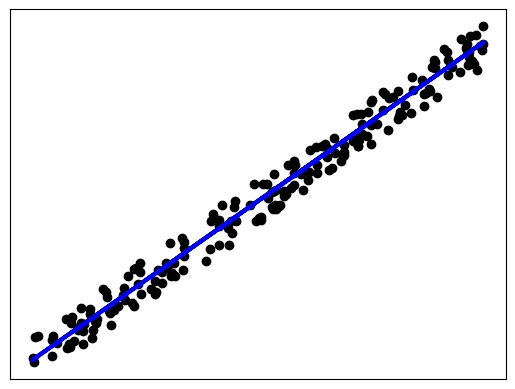

In [8]:

# задаём начальные случайные значения коэффициентам линейной регрессии 
a = np.random.randn(1)
b = np.random.randn(1)
print(a,b)

# скорость обучения
lr = 0.01
# количество эпох
n_epochs = 10000

# основной цикл
for epoch in range(n_epochs):
  
    # рассчитываем результирующий массив с текущими коэффициентами a и b
    # на основе обучающей выборки 
    yhat = a + b * diabetes_X_train
    
    # 1. определяем лосс
    # считаем отклонение нового результата от обучающего:
    error = (diabetes_y_train - yhat)
    
    # 2. считаем градиенты
    # для коэффициента a
    a_grad = -2 * error.mean()
    # для коэффициента b
    b_grad = -2 * (diabetes_X_train * error).mean()
    
    # 3. обновляем параметры, используя коэффициент скорости обучения
    a = a - lr * a_grad
    b = b - lr * b_grad
print(a,b)   


diabetes_y_predq = b*diabetes_X_test+a

plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_predq, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [9]:
regr.coef_

array([[7.02631651]])

Второе задание 

обучить логистическую регрессию на цветочках
сравнить разные стратегии обучения (one-one one-all)
посчитать метрики (prec,recall,acc)
как их интрепретировать
отобразить с разделяющими линиями на двумерномб цветами

In [11]:
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import *
from sklearn.manifold import TSNE
import numpy as np 
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

training score : 0.995 (multinomial)
training score : 0.976 (ovr)


/tmp/ipykernel_5391/3308774751.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipykernel_5391/3308774751.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


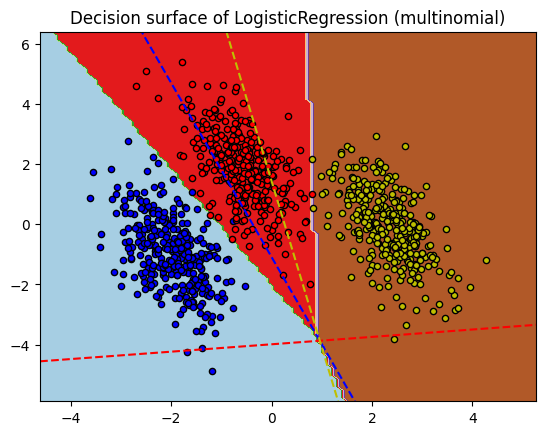

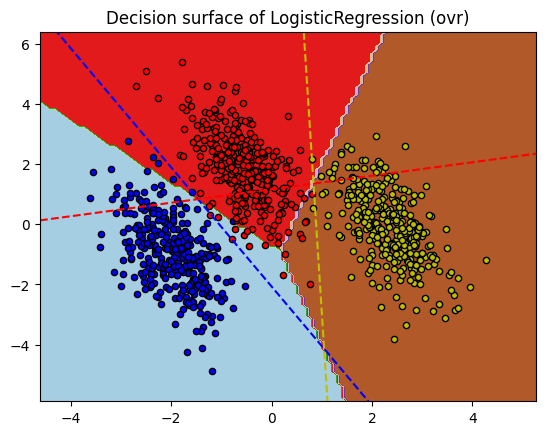

In [12]:
# Authors: Tom Dupre la Tour <tom.dupre-la-tour@m4x.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for multi_class in ("multinomial", "ovr"):
    clf = LogisticRegression(
        solver="sag", max_iter=100, random_state=42, multi_class=multi_class
    ).fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf, X, response_method="predict", cmap=plt.cm.Paired, ax=ax
    )
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis("tight")

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

In [21]:
# Библиотека базовой функции
import numpy as np 
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Мы используем данные Iris, которые поставляются с Sklearn в качестве увеличения данных
from sklearn.datasets import load_iris
data = load_iris() #     
iris_target = data.target # 
iris_features = pd.DataFrame(data=data.data, columns=data.feature_names) #USE Pandas для преобразования в формат DataFrame, и используйте функцию_names в качестве имени

# Использовать .info () для просмотра общей информации данных
iris_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [29]:
# Чтобы правильно оценить производительность модели, данные делятся на учебные наборы и наборы тестирования, а обучающая модель обучается на учебном наборе для проверки производительности модели на тестовом наборе.
# train_test_split используется для разделения набора данных на учебный набор и набор тестов
from sklearn.model_selection import train_test_split

# Выбранные данные для обучения и тестирования
# Выберите образец с 0 и 1 (исключая образцы с категорией 2)
iris_features_part = iris_features.iloc[:100]
iris_target_part = iris_target[:100]

# Разделите данные и метки в соответствии с test_size = 0,2
# Размер обучения составляет 80%, размер набора тестов составляет 20%, 80%/20%баллов
x_train, x_test, y_train, y_test = train_test_split(iris_features, iris_target, test_size = 0.2, random_state = 2020)
# Определите модель логической регрессии, установите решение «LBFG»
clf = LogisticRegression(random_state=0, solver='lbfgs')
#Модель регрессии логики обучения на учебном наборе
clf.fit(x_train, y_train)


# Посмотреть его соответствующий w (коэффициент)
print('the weight of Logistic Regression:\n',clf.coef_)

# Посмотреть его соответствующий w0 (перехват)
print('the intercept(w0) of Logistic Regression:\n',clf.intercept_)

the weight of Logistic Regression:
 [[-0.45928925  0.83069887 -2.26606531 -0.99743981]
 [ 0.33117319 -0.72863423 -0.06841147 -0.9871103 ]
 [ 0.12811606 -0.10206463  2.33447678  1.98455011]]
the intercept(w0) of Logistic Regression:
 [  9.43880672   3.93047364 -13.36928036]


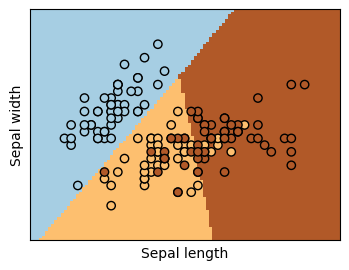

In [39]:

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()

In [9]:
# Библиотека базовой функции
import numpy as np 
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
# Чтобы правильно оценить производительность модели, данные делятся на учебные наборы и наборы тестирования, а обучающая модель обучается на учебном наборе для проверки производительности модели на тестовом наборе.
# train_test_split используется для разделения набора данных на учебный набор и набор тестов
from sklearn.model_selection import train_test_split
# Мы используем данные Iris, которые поставляются с Sklearn в качестве увеличения данных
from sklearn.datasets import load_iris



data = load_iris() #     
iris_target = data.target # 
iris_features = pd.DataFrame(data=data.data, columns=data.feature_names) #USE Pandas для преобразования в формат DataFrame, и используйте функцию_names в качестве имени

# Разделите данные и метки в соответствии с test_size = 0,2
# Размер обучения составляет 80%, размер набора тестов составляет 20%, 80%/20%баллов
x_train, x_test, y_train, y_test = train_test_split(iris_features, iris_target, test_size = 0.2, random_state = 2020)

iris_features['target']= data.target
iris_features.target.value_counts()


# Выбранные данные для обучения и тестирования
# Выберите образец с 0 и 1 (исключая образцы с категорией 2)
iris_features_part = iris_features.iloc[:100]
iris_target_part = iris_target[:100]
iris_features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
ovr_model = LogisticRegression(multi_class = 'ovr')
ovr_model = ovr_model.fit(x_train, y_train)
y_pred = ovr_model.predict(x_test)

accuracy_score(y_pred, y_test)

NameError: name 'accuracy_score' is not defined

In [146]:
precision_score(y_pred, y_test,average='micro')


0.8

In [147]:
recall_score(y_pred, y_test,average='micro')

0.8

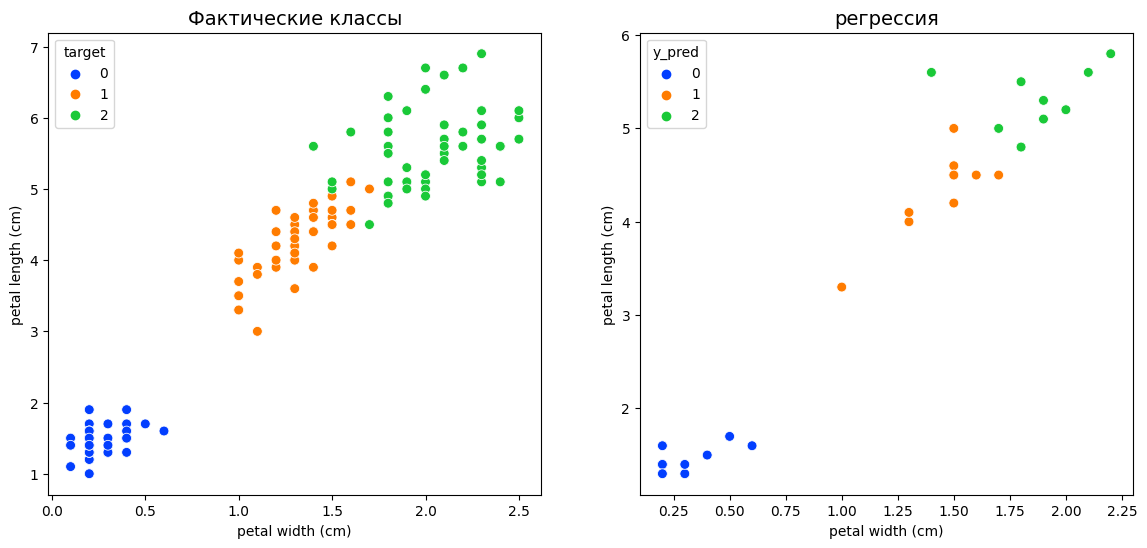

In [143]:
predictions = iris_features[['petal width (cm)', 'petal length (cm)']].copy()
predictions1 = x_test
predictions1['y_pred']= y_pred

fig, (ax1, ax2) = plt.subplots(1, 2, 
                               figsize = (14, 6),
                               gridspec_kw = {'wspace': 0.2, 'hspace': 0.08})

sns.scatterplot(data = iris_features, x = 'petal width (cm)', y = 'petal length (cm)', hue = 'target', palette = 'bright', s = 50, ax = ax1)
ax1.set_title('Фактические классы', fontsize = 14)

sns.scatterplot(data = predictions1, x = 'petal width (cm)', y = 'petal length (cm)', hue = 'y_pred', palette = 'bright', s = 50, ax = ax2)
ax2.set_title('регрессия', fontsize = 14)

plt.show()

In [151]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

In [13]:
# Библиотека базовой функции
import numpy as np 
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
# Чтобы правильно оценить производительность модели, данные делятся на учебные наборы и наборы тестирования, а обучающая модель обучается на учебном наборе для проверки производительности модели на тестовом наборе.
# train_test_split используется для разделения набора данных на учебный набор и набор тестов
from sklearn.model_selection import train_test_split
# Мы используем данные Iris, которые поставляются с Sklearn в качестве увеличения данных
from sklearn.datasets import load_iris
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import *
from sklearn.manifold import TSNE


data = load_iris() #     
iris_target = data.target # 
iris_features = pd.DataFrame(data=data.data, columns=data.feature_names) #USE Pandas для преобразования в формат DataFrame, и используйте функцию_names в качестве имени

# Разделите данные и метки в соответствии с test_size = 0,2
# Размер обучения составляет 80%, размер набора тестов составляет 20%, 80%/20%баллов
x_train, x_test, y_train, y_test = train_test_split(iris_features, iris_target, test_size = 0.2, random_state = 2020)

iris_features['target']= data.target
iris_features.target.value_counts()





0    50
1    50
2    50
Name: target, dtype: int64

In [14]:
ovo_clf = OneVsOneClassifier (LogisticRegression(multi_class = 'ovr'))
ovo_clf.fit(x_train, y_train)
ova_clf1 = OneVsRestClassifier (LogisticRegression(multi_class = 'ovr'))
ova_clf1.fit(x_train, y_train)
y_pred = ovo_clf.predict(x_test)
y_predA = ova_clf1.predict(x_test)
#print("Точность один против одного:", ovo_clf.score(x_test, y_test))
#print("Точность один против всех:", ova_clf1.score(x_test, y_test)) 
print("recall",recall_score(y_pred, y_test,average='micro'))
print("precision",precision_score(y_pred, y_test,average='micro'))
print("accuracy",accuracy_score(y_pred, y_test))

print("recallA",recall_score(y_predA, y_test,average='micro'))
print("precisionA",precision_score(y_predA, y_test,average='micro'))
print("accuracyA",accuracy_score(y_predA, y_test))

recall 0.8666666666666667
precision 0.8666666666666667
accuracy 0.8666666666666667
recallA 0.8
precisionA 0.8
accuracyA 0.8


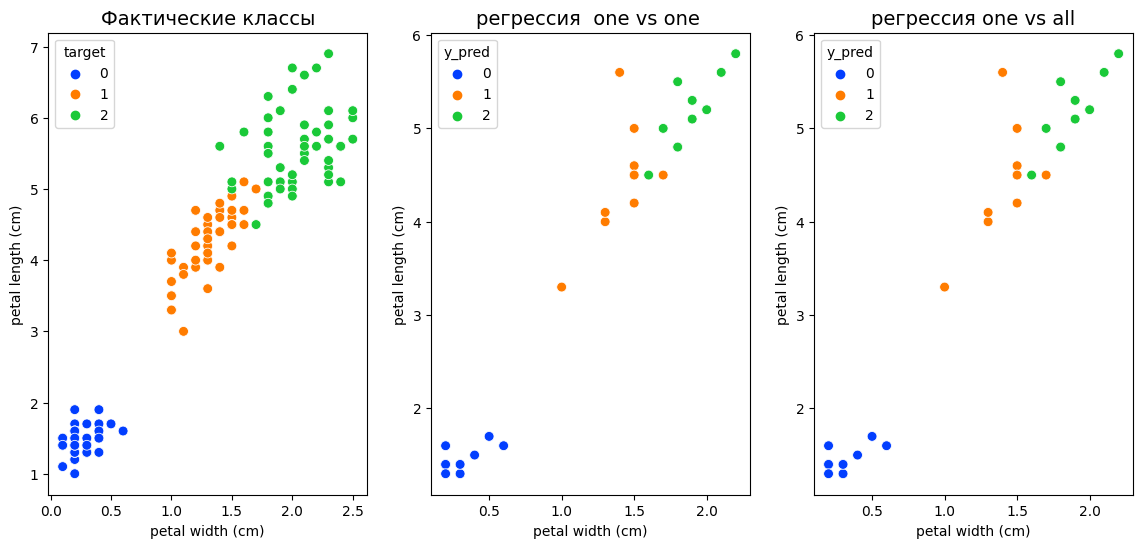

In [15]:


predictions = iris_features[['petal width (cm)', 'petal length (cm)']].copy()
predictions1 = x_test
predictions1['y_pred']= y_pred
predictions2 = x_test
predictions2['y_pred']= y_predA


fig, (ax1, ax2, ax3) = plt.subplots(1, 3,
                               figsize = (14, 6),
                               gridspec_kw = {'wspace': 0.2, 'hspace': 0.08})

sns.scatterplot(data = iris_features, x = 'petal width (cm)', y = 'petal length (cm)', hue = 'target', palette = 'bright', s = 50, ax = ax1)
ax1.set_title('Фактические классы', fontsize = 14)

sns.scatterplot(data = predictions1, x = 'petal width (cm)', y = 'petal length (cm)', hue = 'y_pred', palette = 'bright', s = 50, ax = ax2)
ax2.set_title('регрессия  one vs one ', fontsize = 14)

sns.scatterplot(data = predictions2, x = 'petal width (cm)', y = 'petal length (cm)', hue = 'y_pred', palette = 'bright', s = 50, ax = ax3)
ax3.set_title('регрессия one vs all', fontsize = 14)

plt.show()